# **Prodigy infotech** Machine learning Task - 1


## **Statement**: Implement a linear regression model to predict the prices of houses based on their square footage and the number of bedrooms and bathrooms.

## Uploading dataset from kaggle

In [ ]:
!kaggle datasets download -d goelyash/housing-price-dataset-of-delhiindia

Dataset URL: https://www.kaggle.com/datasets/goelyash/housing-price-dataset-of-delhiindia
License(s): CC0-1.0
  0% 0.00/944k [00:00<?, ?B/s]
100% 944k/944k [00:00<00:00, 51.7MB/s]


### Zip file extracting

In [ ]:
from zipfile import ZipFile
with ZipFile('/content/housing-price-dataset-of-delhiindia.zip','r') as zipObj:
  zipObj.extractall('/content/House_Price')

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
df = pd.read_csv('/content/House_Price/Delhi_v2.csv')
df.head()

,Unnamed: 0,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,Landmarks,type_of_building,desc,Price_sqft
0,0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,28.608850,77.460560,3.0,3.0,NaN,Under Construction,New Property,NaN,NaN,2.0,NaN,Flat,\n\n\n Welcome ...,4148.148148
1,1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,28.374236,76.952416,3.0,3.0,NaN,Ready to Move,New Property,NaN,Semi-Furnished,2.0,NaN,Flat,\n\n\n Mapsko M...,5906.040268
2,2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,28.645769,77.385110,4.0,5.0,NaN,Ready to Move,New Property,1.0,Unfurnished,NaN,NaN,Flat,\n\n\n This pro...,6918.238994
3,3,3810000.0,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050.0,28.566914,77.436434,2.0,2.0,3.0,NaN,New Property,1.0,Unfurnished,2.0,near Gaur Mulberry Mansion,Flat,\n\n\n AIG Roya...,3628.571429
4,4,6200000.0,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350.0,28.520732,77.356491,2.0,2.0,3.0,Ready to Move,Resale,1.0,NaN,3.0,NaN,Flat,\n\n\n The prop...,4592.592593


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7738 entries, 0 to 7737
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7738 non-null   int64  
 1   price             7738 non-null   float64
 2   Address           7738 non-null   object 
 3   area              7738 non-null   float64
 4   latitude          7738 non-null   float64
 5   longitude         7738 non-null   float64
 6   Bedrooms          7738 non-null   float64
 7   Bathrooms         7738 non-null   float64
 8   Balcony           5166 non-null   float64
 9   Status            7164 non-null   object 
 10  neworold          7738 non-null   object 
 11  parking           2612 non-null   float64
 12  Furnished_status  4124 non-null   object 
 13  Lift              1733 non-null   float64
 14  Landmarks         2759 non-null   object 
 15  type_of_building  7738 non-null   object 
 16  desc              7738 non-null   object 


### Data statistic analysis

In [54]:
df.describe()

,Unnamed: 0,price,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,parking,Lift,Price_sqft
count,7738.000000,7.738000e+03,7738.000000,7738.000000,7738.000000,7738.000000,7738.000000,5166.000000,2612.000000,1733.000000,7738.000000
mean,3868.500000,8.320635e+06,1409.506591,28.552092,77.273476,2.708193,2.501163,2.426442,7.673047,1.829198,5543.660241
std,2233.912524,7.223197e+06,718.929581,0.107420,0.180606,0.877026,0.867050,1.083677,60.417508,1.192607,2408.659307
min,0.000000,1.700000e+06,501.000000,28.240023,76.884101,2.000000,2.000000,1.000000,1.000000,0.000000,2100.000000
25%,1934.250000,4.200000e+06,990.000000,28.455539,77.078590,2.000000,2.000000,2.000000,1.000000,1.000000,3950.986915
50%,3868.500000,6.000000e+06,1250.000000,28.574637,77.345320,3.000000,2.000000,2.000000,1.000000,2.000000,4972.674332
75%,5802.750000,9.500000e+06,1650.000000,28.642520,77.421054,3.000000,3.000000,3.000000,2.000000,2.000000,6350.638693
max,7737.000000,8.500000e+07,9500.000000,28.799748,77.688028,10.000000,10.000000,10.000000,1406.000000,10.000000,44378.698225


In [55]:
df.columns

Index(['Unnamed: 0', 'price', 'Address', 'area', 'latitude', 'longitude',
       'Bedrooms', 'Bathrooms', 'Balcony', 'Status', 'neworold', 'parking',
       'Furnished_status', 'Lift', 'Landmarks', 'type_of_building', 'desc',
       'Price_sqft'],
      dtype='object')

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

## Data preprocessing

In [57]:
numerical_features = ['price', 'area', 'Bedrooms', 'Bathrooms', 'Price_sqft']
categorical_features = ['Address', 'Status', 'neworold', 'Furnished_status', 'type_of_building']

In [58]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [59]:
# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [60]:
# Define the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


In [61]:
# Prepare the data (excluding columns that are not features)
X = df.drop(columns=['Unnamed: 0', 'latitude', 'longitude', 'desc', 'Landmarks'])  # Dropping non-predictive features
y = df['price']

## Training data

In [62]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
# Train the model
lm = LinearRegression()
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['price', 'area', 'Bedrooms',
                                                   'Bathrooms', 'Price_sqft']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Address', 'Status',
                                                   'neworold',
                                                   'Furnished_status',
                                                   'type_of_building'])])),
                ('regressor', LinearRegression())])

In [64]:
# Predict on the test set
y_pred = model.predict(X_test)

In [67]:
linear_regression_model = model.named_steps['regressor']  # Replace 'regressor' with the actual name you gave to your regressor step
print(linear_regression_model.intercept_)

8330867.10509473


## Data visualisation

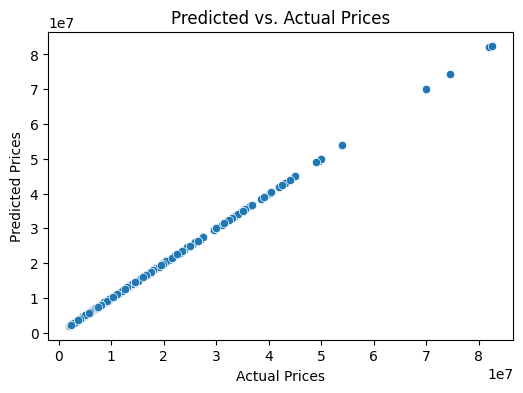

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

#Predicting on the test set
y_pred = model.predict(X_test)

#Plotting Predicted vs. Actual values
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs. Actual Prices')
plt.show()

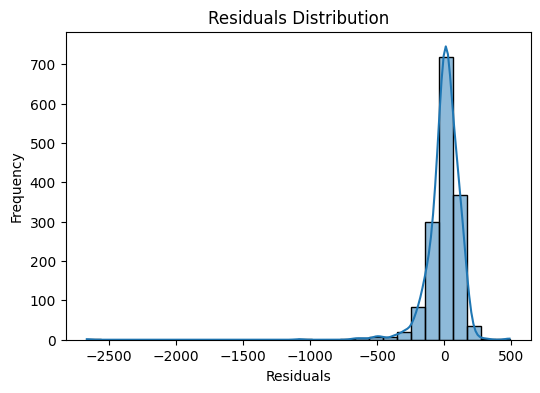

In [69]:
#Plotting the residuals
plt.figure(figsize=(6, 4))
sns.histplot(y_test - y_pred, kde=True, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()

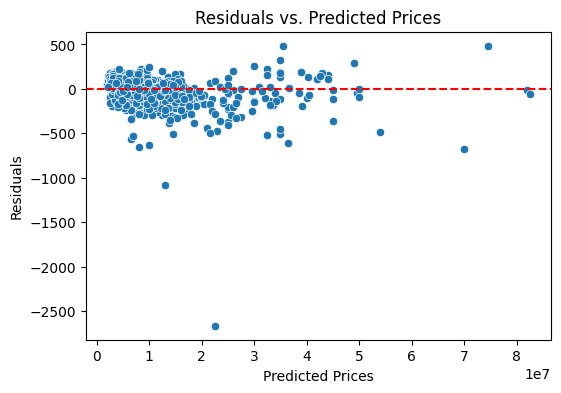

In [70]:
#Residuals scatter plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred, y=y_test - y_pred)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Prices')
plt.show()

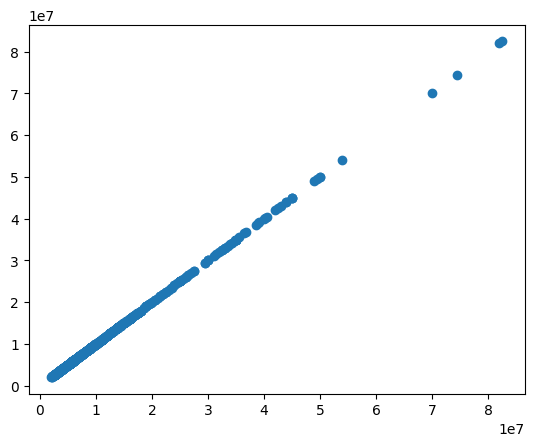

In [71]:
predictions = model.predict(X_test)
plt.scatter(y_test,predictions)

### Evaluate the model

In [75]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'R² Score: {r2}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

R² Score: 0.999999999702389
Mean Absolute Error: 80.76810820325541
Root Mean Squared Error: 132.8287698842138
